In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 1: Bird baths in Australia

In [215]:
# load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-31/bird_baths.csv'
birds = pd.read_csv(url)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird_count
0,2014.0,Urban,South Eastern Queensland,Bassian Thrush,0
1,2014.0,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2,2014.0,Urban,South Eastern Queensland,Wild Duck,0
3,2014.0,Urban,South Eastern Queensland,Willie Wagtail,0
4,2014.0,Urban,South Eastern Queensland,Regent Bowerbird,0


Our **goal** is to predict the probability of whether we’ll see a bird at a bird bath in Australia, given info like what kind of bird we’re looking for and whether the bird bath is in an urban or rural location.

We'll focus on birds from the following list.

In [218]:
birds_list = [
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
]

**Part 1:** Filter out the bird types that are not on the `birds_list` list.

In [219]:
# your code here


**Part 2:** Add a `bird` column to the DataFrame, where the value is `1` when `bird_count>0`, and `0` when `bird_count=0`.

In [311]:
# your code here


Drop the `bird_count` column

In [312]:
# your code here


**Part 3:** How likely are you to see birds of different types (Australian Magpie, Crested Pigeon,...) in different locations (rural, urban)?

**Hint**: use `pd.pivot_table`.

In [ ]:
# your code here
probability = pd.pivot_table()

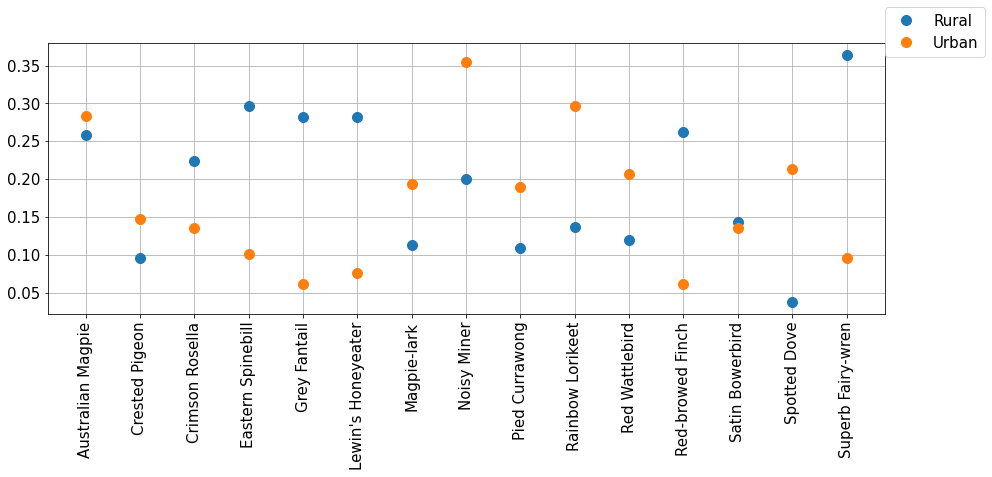

In [268]:
# run this cell to plot probabilities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(probability.Rural,'o',markersize='10', label='Rural')
ax.plot(probability.Urban,'o',markersize='10', label='Urban')
ax.grid(True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

We'll use the `urban_rural`, `bird_type` and `bioregions` features to predict these probabilities.

**Part 4:** Define the feature matrix X (columns `urban_rural`, `bird_type` and `bioregions`) and the target vector y (`bird` column) from the dataframe, and then split X and y into training and testing sets.

In [269]:
# your code here


**Part 5:** build a pipeline with the following steps: an imputer, a one-hot-encoder, and a logistic regression model.

In [294]:
# your code here


Fit your pipeline to the training data

In [307]:
# your code here


Use the `predict_proba` method to compute the seeing-a-bird probability on the testing data.

In [308]:
# your code here


Run the following two cells.

In [309]:
# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_test_proba
results

In [ ]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

The predicted probabilities don't look great. 

**Part 6:** Add polynomial features (of degree 2) to your pipeline, and repeat **Part 5**

In [310]:
# your code here
